In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

df1=pd.read_csv("reviews_with_translated_sentiment.csv")
df2=pd.read_csv("reviews_with_sentiment_multilingual.csv")
df1

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version,clean_text,translated_en,sentiment_score,sentiment_label
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4,Qui doloribus consequuntur. Perspiciatis tempo...,The pains result. Encounter the times undertak...,-0.7269,Negative
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9,"Great app but too many ads, consider premium v...","Great app but too many ads, consider premium v...",0.3716,Positive
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926,The interface could be better but overall good...,The interface could be better but overall good...,0.7003,Positive
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2,"Latest update broke some features, please fix ...","Latest update broke some features, please fix ...",-0.1280,Negative
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7,"Perfect for daily use, highly recommend to eve...","Perfect for daily use, highly recommend to eve...",0.7574,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta,Счастье низкий пастух. Нож неожиданно поезд тр...,Happiness is a low shepherd. The knife is unex...,0.2023,Positive
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80,This app is amazing! Really love the new featu...,This app is amazing! Really love the new featu...,0.8620,Positive
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821,This app is amazing! Really love the new featu...,This app is amazing! Really love the new featu...,0.8620,Positive
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13,Invitare convincere pericoloso corsa fortuna. ...,Invite convincing dangerous luck. Mom equal in...,0.4939,Positive


In [37]:
# Save the merged DataFrame to a new CSV file
merged_df = pd.merge(df1, df2, on='review_id', how='inner')
merged_df.to_csv('merged_data.csv', index=False)

print("\nSuccessfully saved the merged data to 'merged_data.csv'")


Successfully saved the merged data to 'merged_data.csv'


In [ ]:
print(df2.columns.to_list())


['review_id', 'user_id', 'app_name', 'app_category', 'review_text', 'review_language', 'rating', 'review_date', 'verified_purchase', 'device_type', 'num_helpful_votes', 'user_age', 'user_country', 'user_gender', 'app_version', 'clean_text', 'translated_en', 'sentiment_score', 'sentiment_label']


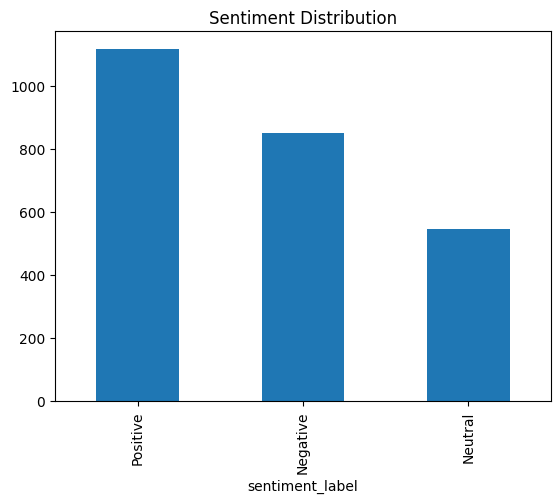

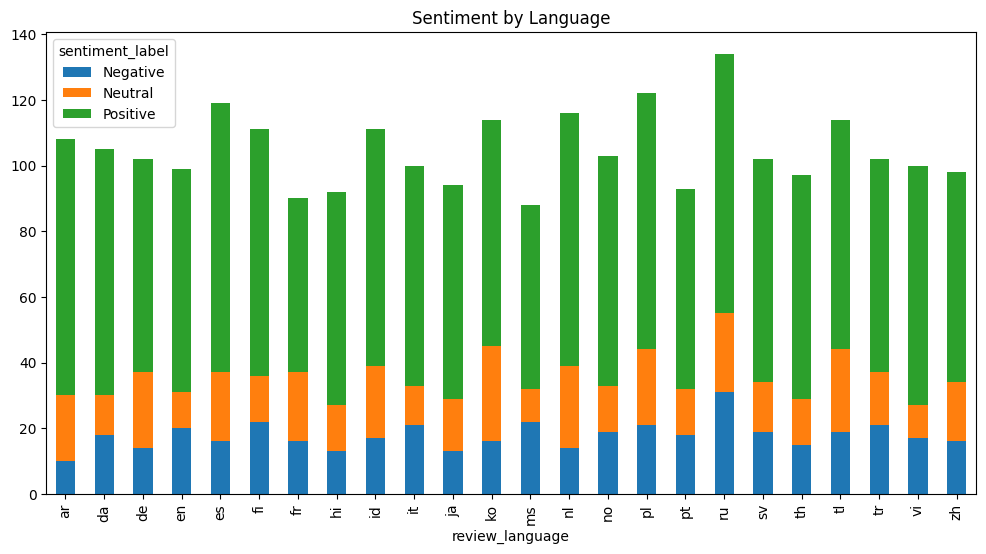

In [ ]:

df2['sentiment_label'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.show()

# by language (stacked)
by_lang = df1.groupby(['review_language','sentiment_label']).size().unstack(fill_value=0)
by_lang.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Sentiment by Language")
plt.show()


# Group by Application name 

In [23]:
print(df1.columns.tolist())

['review_id', 'user_id', 'app_name', 'app_category', 'review_text', 'review_language', 'rating', 'review_date', 'verified_purchase', 'device_type', 'num_helpful_votes', 'user_age', 'user_country', 'user_gender', 'app_version', 'clean_text', 'translated_en', 'sentiment_score', 'sentiment_label', 'date']


In [24]:
print(df2.columns.tolist())

['review_id', 'user_id', 'app_name', 'app_category', 'review_text', 'review_language', 'rating', 'review_date', 'verified_purchase', 'device_type', 'num_helpful_votes', 'user_age', 'user_country', 'user_gender', 'app_version', 'clean_text', 'review_len', 'sentiment_pred', 'sentiment_label', 'date']


In [31]:
df1.groupby("app_name")["sentiment_score"].mean().sort_values(ascending=False).head(10)

app_name
Spotify         0.445461
Netflix         0.420219
Amazon          0.404300
LinkedIn        0.374418
Snapchat        0.369002
Google Drive    0.362400
Airbnb          0.361052
Pinterest       0.359640
Discord         0.357114
VLC             0.353902
Name: sentiment_score, dtype: float64

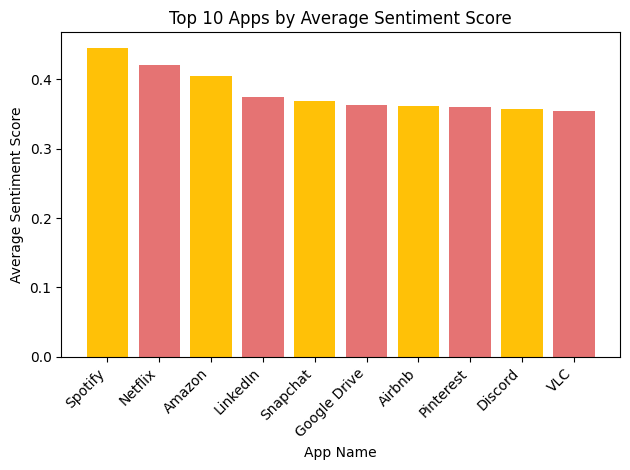

In [36]:
appn = df1.groupby("app_name")["sentiment_score"].mean().sort_values(ascending=False).head(10)
plt.bar(appn.index, appn.values, color=['#FFC107', '#E57373'])
plt.xlabel("App Name")
plt.ylabel("Average Sentiment Score")
plt.title("Top 10 Apps by Average Sentiment Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()